In [72]:
# import some common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pycountry

In [6]:
#load data
events = pd.read_csv('events.csv')
events.head()

,user_id,ga_session_id,country,device,type,item_id,date
0,16563,15963,US,desktop,purchase,426,2020-11-01 06:17:40
1,16563,15963,US,desktop,purchase,427,2020-11-01 06:17:40
2,16563,15963,US,desktop,purchase,428,2020-11-01 06:17:40
3,16563,15963,US,desktop,purchase,173,2020-11-01 06:17:40
4,23766,16910,TR,desktop,purchase,173,2020-11-01 12:18:34


In [ ]:
events_country = events
events_country['Country_Name'] = events_country['ISO_Code'].map(iso_to_country)

<Axes: xlabel='country'>

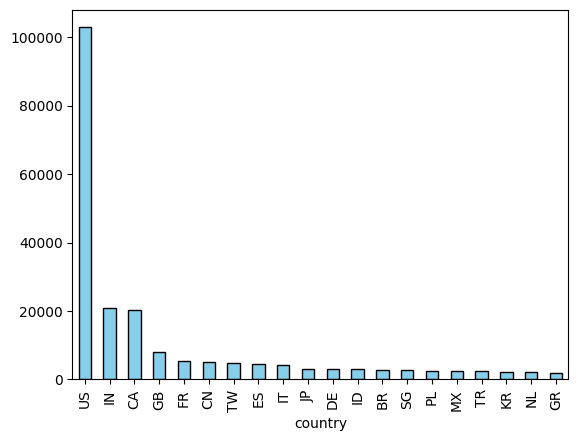

In [71]:
country_counts = events['country'].value_counts()
country_counts = country_counts.head(20)
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

<Axes: xlabel='type'>

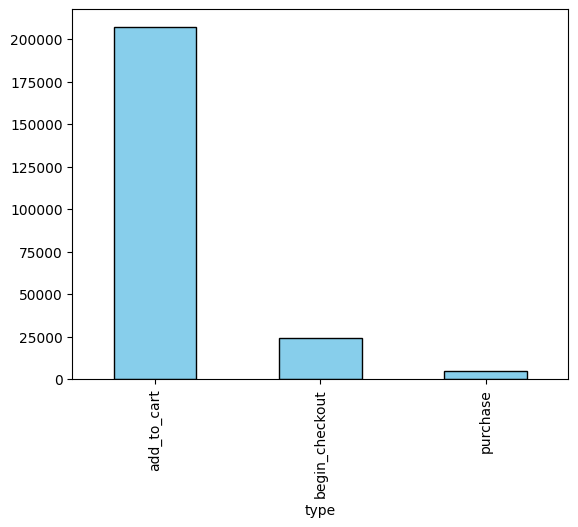

In [19]:
purchase_counts = events['type'].value_counts()
purchase_counts = purchase_counts.head(30)
purchase_counts.plot(kind='bar', color='skyblue', edgecolor='black')

In [23]:
print(purchase_counts)
print(type(purchase_counts))
print(purchase_counts['purchase']/purchase_counts['begin_checkout'])
print(purchase_counts['begin_checkout']/purchase_counts['add_to_cart'])
print(purchase_counts['purchase']/purchase_counts['add_to_cart'])

type
add_to_cart       207227
begin_checkout     24048
purchase            4903
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
0.2038838988689288
0.1160466541522099
0.02366004429924672


<Axes: xlabel='device'>

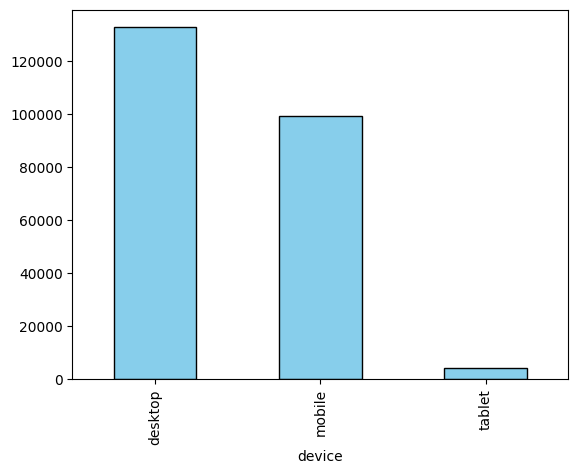

In [24]:
device_counts = events['device'].value_counts()
device_counts = device_counts.head(30)
device_counts.plot(kind='bar', color='skyblue', edgecolor='black')

(array([18567., 18581., 18597., 18611., 18628., 18642., 18659.]),
 [Text(18567.0, 0, '2020-11-01'),
  Text(18581.0, 0, '2020-11-15'),
  Text(18597.0, 0, '2020-12-01'),
  Text(18611.0, 0, '2020-12-15'),
  Text(18628.0, 0, '2021-01-01'),
  Text(18642.0, 0, '2021-01-15'),
  Text(18659.0, 0, '2021-02-01')])

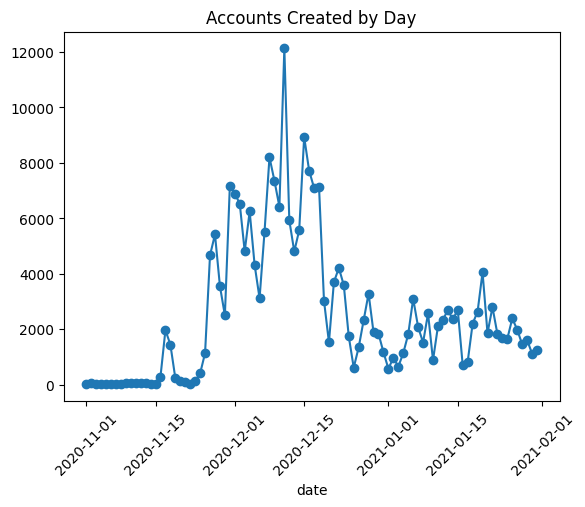

In [25]:
events["date"] = pd.to_datetime(events["date"])
daily_counts = events.groupby(events["date"].dt.date).size()
daily_counts.plot(kind="line", marker="o", title="Accounts Created by Day")
plt.xticks(rotation=45)

In [50]:
#load data
items = pd.read_csv('items.csv')
items = items.rename(columns={'id': 'item_id'})
print(items)

      item_id                              name             variant  \
0           0             Land & Sea Cotton Cap  Single Option Only   
1           1                           KeepCup  Single Option Only   
2           2   Land & Sea Nalgene Water Bottle  Single Option Only   
3           3              Unisex Eco Tee Black                  LG   
4           4             Chicago Campus Bottle  Single Option Only   
...       ...                               ...                 ...   
1376     1376                Tritan Bottle Gray                 NaN   
1377     1377              White  Cloud Tumbler                 NaN   
1378     1378                Separating Keyring                 NaN   
1379     1379       Mountain View Campus Bottle                 NaN   
1380     1380         Boulder Campus Ladies Tee                  LG   

                 category  price_in_usd  
0                 Apparel            14  
1                     New            28  
2               Drink

<Axes: xlabel='category'>

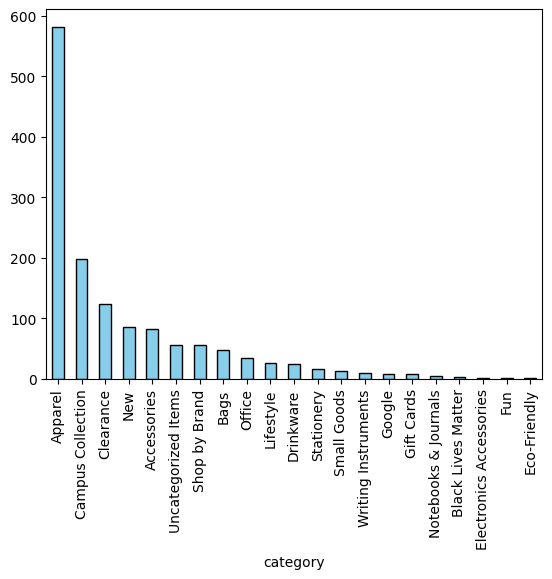

In [29]:
category_counts = items['category'].value_counts()
category_counts = category_counts.head(30)
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

<Axes: xlabel='category'>

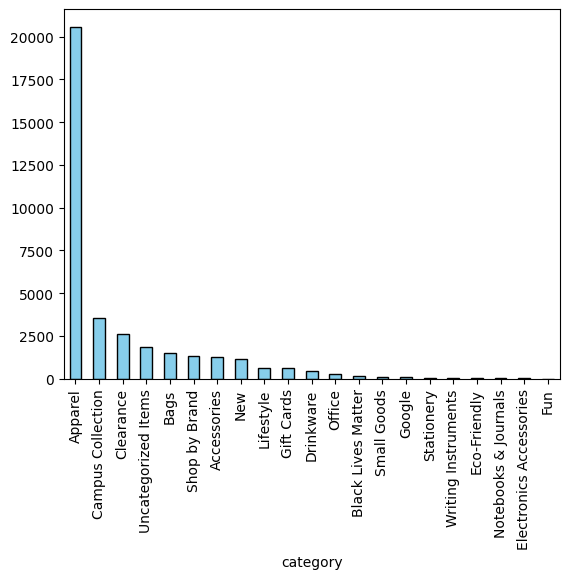

In [31]:
category_sums = items.groupby('category')['price_in_usd'].sum()
category_sums = category_sums.nlargest(30)
category_sums.plot(kind='bar', color='skyblue', edgecolor='black')

In [52]:
#load data
users = pd.read_csv('users.csv')
users = users.rename(columns={'id': 'user_id'})
print(users)

       user_id  ltv                 date
0            0    0  2020-10-13 05:08:47
1            3  231  2020-05-02 11:09:15
2            5    0  2020-11-30 07:43:12
3            7   55  2020-11-25 05:01:47
4           10    0  2020-11-30 00:47:28
...        ...  ...                  ...
81041   270144    0  2020-11-28 21:39:25
81042   270145    0  2020-12-18 03:58:28
81043   270147    0  2020-11-10 19:19:19
81044   270148    0  2020-06-30 09:50:04
81045   270152    0  2020-11-04 20:20:03

[81046 rows x 3 columns]


(array([18201., 18262., 18322., 18383., 18444., 18506., 18567., 18628.]),
 [Text(18201.0, 0, '2019-11'),
  Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07'),
  Text(18506.0, 0, '2020-09'),
  Text(18567.0, 0, '2020-11'),
  Text(18628.0, 0, '2021-01')])

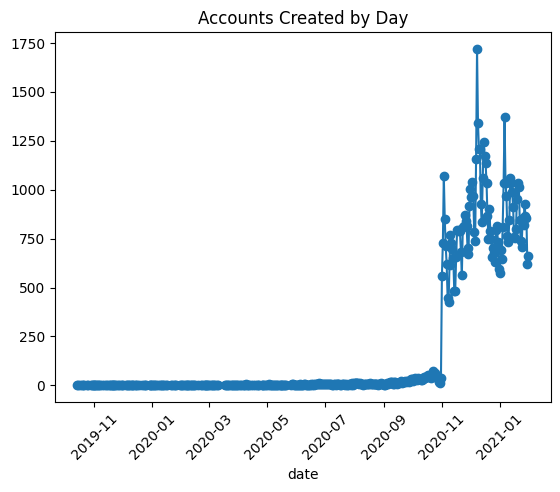

In [ ]:
users["date"] = pd.to_datetime(users["date"])
users = users[users['date'].dt.year != 1970] # remove erroneous dates
daily_counts = users.groupby(users["date"].dt.date).size()
daily_counts.plot(kind="line", marker="o", title="Accounts Created by Day")
plt.xticks(rotation=45)

In [64]:
users_filtered = users[users['ltv'] != 0]
print(users_filtered)

       user_id  ltv                date
1            3  231 2020-05-02 11:09:15
3            7   55 2020-11-25 05:01:47
6           17  378 2020-11-23 22:30:53
7           23  167 2020-11-28 05:19:02
11          37  124 2020-11-30 09:21:53
...        ...  ...                 ...
79519   265047   31 2020-09-24 20:27:50
79849   266157  110 2020-08-23 21:36:55
80149   267180  156 2020-08-19 07:51:23
80279   267629   57 2020-10-03 11:44:21
80896   269634   18 2020-10-24 22:35:14

[1314 rows x 3 columns]


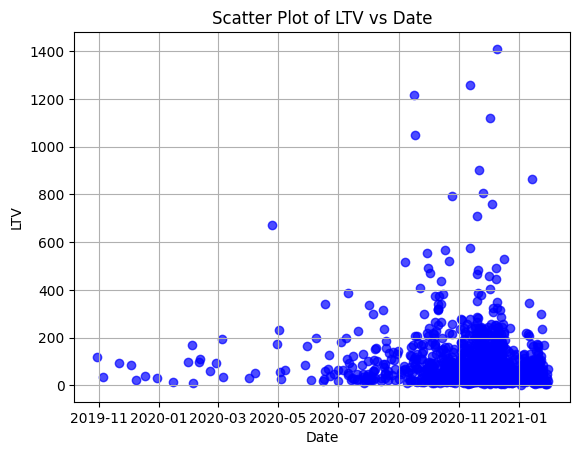

In [66]:
plt.scatter(users_filtered['date'], users_filtered['ltv'], color='blue', alpha=0.7)
plt.title('Scatter Plot of LTV vs Date')
plt.xlabel('Date')
plt.ylabel('LTV')
plt.grid(True)
plt.show()

In [42]:
items = items.rename(columns={'id': 'item_id'})
merged_events_items = pd.merge(events, items, on="item_id", how="left")
print(merged_events_items)

        user_id  ga_session_id country   device            type  item_id  \
0         16563          15963      US  desktop        purchase      426   
1         16563          15963      US  desktop        purchase      427   
2         16563          15963      US  desktop        purchase      428   
3         16563          15963      US  desktop        purchase      173   
4         23766          16910      TR  desktop        purchase      173   
...         ...            ...     ...      ...             ...      ...   
236173    19742           9347      US  desktop  begin_checkout       47   
236174    19742           9347      US  desktop  begin_checkout       47   
236175    19742           9347      US  desktop  begin_checkout       47   
236176    19742           9347      US  desktop  begin_checkout       47   
236177    19742           9347      US  desktop  begin_checkout       47   

                      date                    name             variant  \
0      2020-1

<Axes: xlabel='category'>

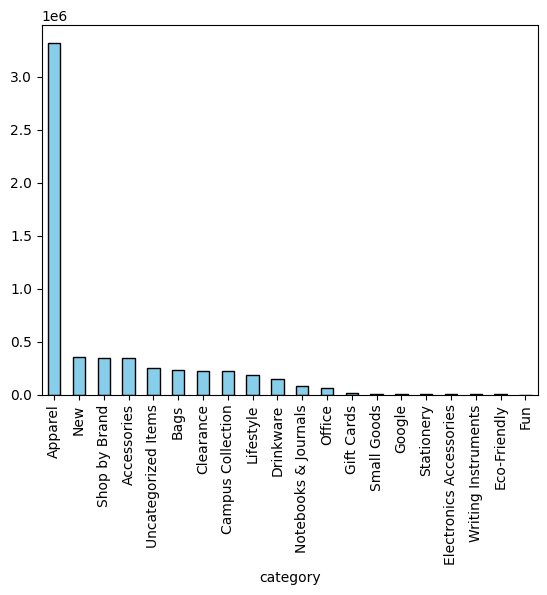

In [49]:
category_sales_sums = merged_events_items.groupby('category')['price_in_usd'].sum()
category_sales_sums = category_sales_sums.nlargest(30)
category_sales_sums.plot(kind='bar', color='skyblue', edgecolor='black')

<Axes: xlabel='category'>

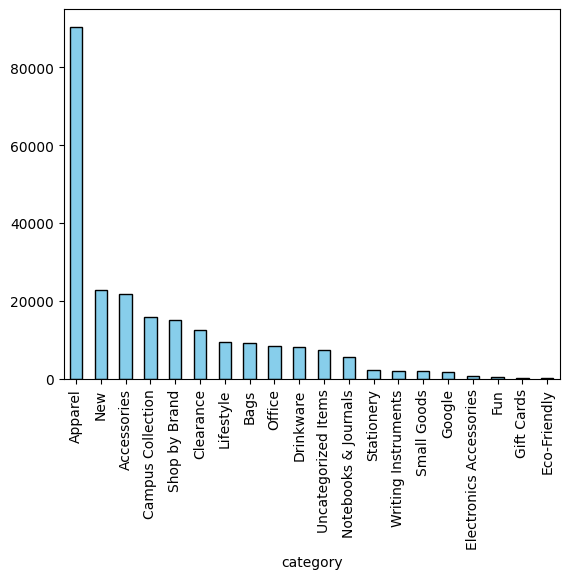

In [55]:
category_sales_counts = merged_events_items['category'].value_counts()
category_sales_counts = category_sales_counts.head(30)
category_sales_counts.plot(kind='bar', color='skyblue', edgecolor='black')

In [62]:
bins = [0, 50, 100, 100000]
labels = ['0-50', '50-100', '100 +']
merged_events_items['Bins'] = pd.cut(merged_events_items['price_in_usd'], bins=bins, labels=labels, include_lowest=True)
print(merged_events_items['Bins'].value_counts())

Bins
0-50      203312
50-100     30674
100 +       2192
Name: count, dtype: int64


<Axes: xlabel='Bins'>

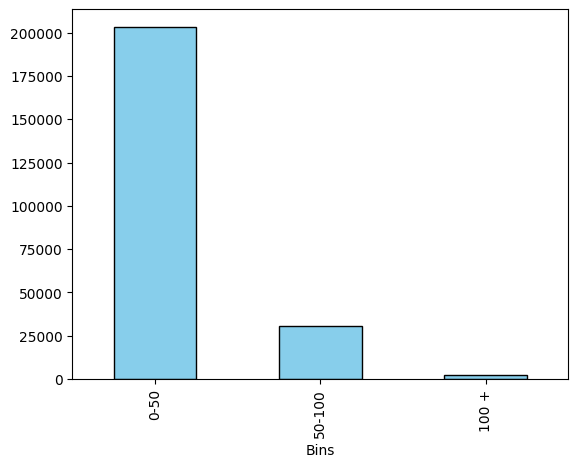

In [63]:
bins_sales_counts = merged_events_items['Bins'].value_counts()
bins_sales_counts.plot(kind='bar', color='skyblue', edgecolor='black')

<Axes: xlabel='name'>

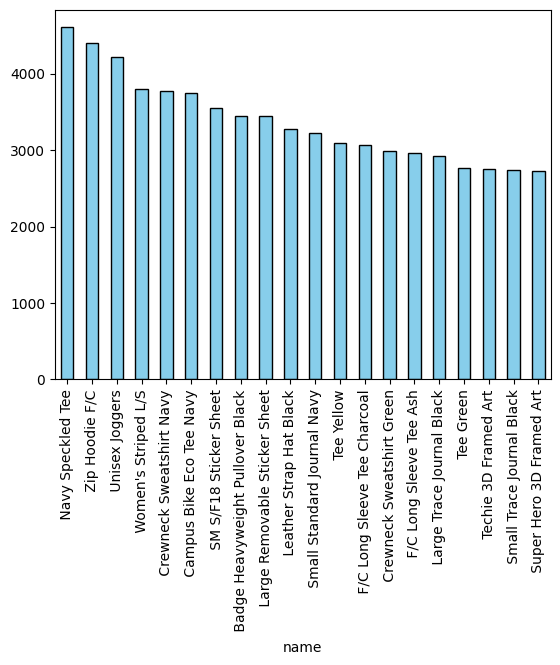

In [68]:
name_sales_counts = merged_events_items['name'].value_counts()
name_sales_counts = name_sales_counts.head(20)
name_sales_counts.plot(kind='bar', color='skyblue', edgecolor='black')